In [1]:
import pandas as pd
import numpy as np
import math
import random

UNCLASSIFIED = 0
NOISE = -1

In [2]:
def _dist(p,q):
    dist=((p[0]-q[0])**2+(p[1]-q[1])**2)**(1/2)
    return dist

In [3]:
def _eps_neighborhood(p,q,eps):
    dist=_dist(p,q)
    right=False
    if dist<=eps:
        right=True
    return right

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(n_points):
        dis=_eps_neighborhood((m[0,point_id],m[1,point_id]),(m[0,i],m[1,i]),eps)
        if dis==True:
            seeds+=[i]
    return seeds

In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds=_region_query(m, point_id, eps)
    if len(seeds)>=min_points+1:
        for i in seeds:
            seeds1=_region_query(m, i, eps)
            if len(seeds1)>=min_points+1:
                for ii in seeds1:
                    if ii in seeds:
                        continue
                    else:
                        seeds+=[ii]
            else:
                continue
        for i in seeds:
            classifications[i]=cluster_id
        return classifications
    else:
        return classifications

In [6]:
def dbscan(m, eps, min_points):
    cluster_id=1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    c=classifications[:]
    for jj in range(n_points):
        if classifications[jj]==0:
            cluster=_expand_cluster(m, classifications, jj, cluster_id, eps, min_points)
            if c!=cluster:
                c=cluster[:]
                classificatins=cluster[:]
                cluster_id+=1
        else:
            continue
    return classifications

In [7]:
dataset_1 = pd.read_csv('C:/Users/USER/Downloads/blobs.csv')[:80].values
dataset_2=pd.read_csv('C:/Users/USER/Downloads/blobs.csv')[:80]
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

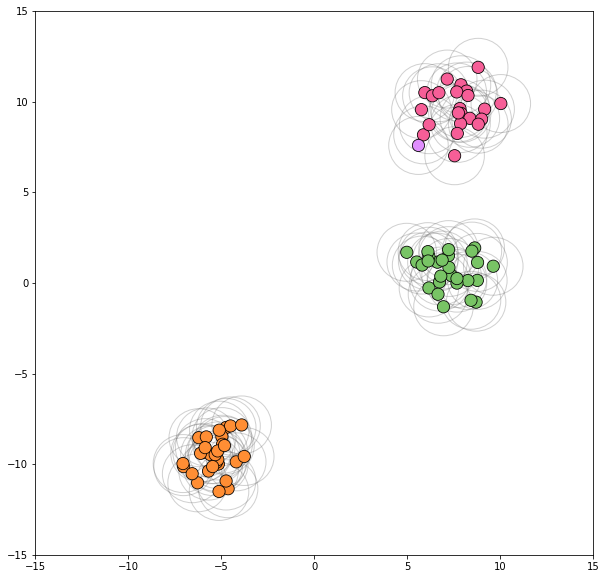

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
dataset_3 = pd.read_csv('varied.csv')[:300]
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

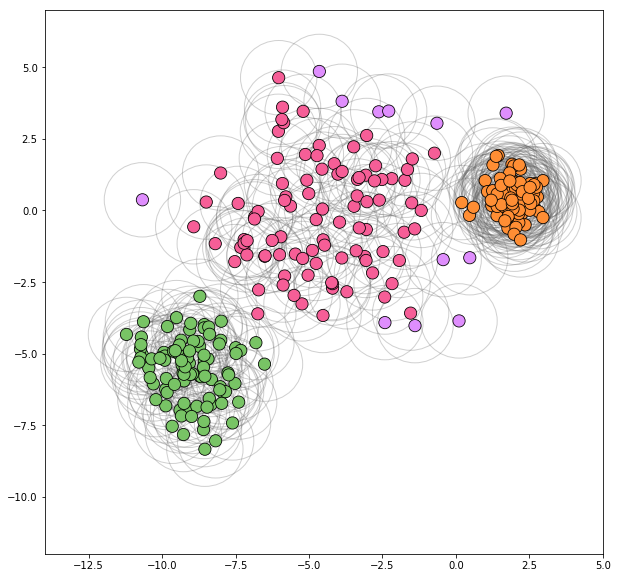

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)